In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\sanja\\Downloads\\athlete_events.csv')
noc_regions = pd.read_csv('C:\\Users\\sanja\\Downloads\\noc_regions.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.shape

(271116, 15)

In [5]:
df = df[df['Season'] =='Summer']

In [6]:
df.sample(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
181432,91183,Khristina Papadaki,F,23.0,173.0,55.0,Greece,GRE,1996 Summer,1996,Summer,Atlanta,Tennis,Tennis Women's Doubles,NaN
114145,57812,Alper Kasapolu,M,26.0,186.0,83.0,Turkey,TUR,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Decathlon,NaN
218441,109713,Hiroshi Shibutani,M,29.0,172.0,65.0,Japan,JPN,1996 Summer,1996,Summer,Atlanta,Table Tennis,Table Tennis Men's Singles,NaN
8189,4517,Salvatore Antibo,M,26.0,170.0,52.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Athletics,"Athletics Men's 10,000 metres",Silver


In [7]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
df =df.merge(noc_regions,on='NOC',how='left')

In [9]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
140529,85712,Marcel Van Minh Phuc Long Nguyen,M,20.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Germany,NaN
71477,43568,L. Guerner,M,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Gymnastics,"Gymnastics Men's Individual All-Around, Appara...",NaN,USA,NaN
62871,38244,Arie Gamliel,M,26.0,165.0,48.0,Israel,ISR,1984 Summer,1984,Summer,Los Angeles,Athletics,"Athletics Men's 5,000 metres",NaN,Israel,NaN
122575,74916,Anna Marejkov (-Krausov),F,23.0,NaN,NaN,Czechoslovakia,TCH,1956 Summer,1956,Summer,Melbourne,Gymnastics,Gymnastics Women's Balance Beam,NaN,Czech Republic,NaN
163319,99637,"Anastasija ""Nastja"" Reiberger (Ryzhikh-)",F,30.0,170.0,57.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Pole Vault,NaN,Germany,NaN


In [10]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [11]:
df.duplicated().sum()

1385

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df =pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [15]:
df.shape

(221167, 20)

In [16]:
df.groupby('NOC').sum()[['Gold','Bronze','Silver']].sort_values('Gold',ascending=False).head(30)

C:\Users\sanja\AppData\Local\Temp\ipykernel_1456\2374139782.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('NOC').sum()[['Gold','Bronze','Silver']].sort_values('Gold',ascending=False).head(30)


,Gold,Bronze,Silver
NOC,,,
USA,2472,1197,1333
URS,832,596,635
GBR,635,620,729
GER,592,649,538
ITA,518,454,474
FRA,463,587,567
HUN,432,363,328
SWE,354,358,396
AUS,342,510,452


In [17]:
df[ (df['Team'] == 'India') & (df['Gold'] ==1) ]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [18]:
medal_tally = df.drop_duplicates(subset=['Team','NOC', 'Games', 'Year','City','Sport','Event','Medal'])

In [19]:
medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [20]:
medal_tally.groupby('NOC').sum()[['Gold','Bronze','Silver']].sort_values('Gold',ascending=False)

C:\Users\sanja\AppData\Local\Temp\ipykernel_1456\529804956.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medal_tally.groupby('NOC').sum()[['Gold','Bronze','Silver']].sort_values('Gold',ascending=False)


,Gold,Bronze,Silver
NOC,,,
USA,1035,708,802
URS,394,294,317
GBR,278,300,317
GER,235,283,261
FRA,234,287,256
...,...,...,...
AHO,0,0,1
LBR,0,0,0
LCA,0,0,0


In [45]:
top_winners = df.groupby('Name').sum()[['Gold','Bronze','Silver']].sort_values(by='Gold',ascending=False).head(5)

C:\Users\sanja\AppData\Local\Temp\ipykernel_1456\3174336877.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_winners = df.groupby('Name').sum()[['Gold','Bronze','Silver']].sort_values(by='Gold',ascending=False).head(5)


In [46]:
top_winners.reset_index(inplace=True)

In [47]:
top_winners

,Name,Gold,Bronze,Silver
0,"Michael Fred Phelps, II",23,2,3
1,"Raymond Clarence ""Ray"" Ewry",10,0,0
2,Larysa Semenivna Latynina (Diriy-),9,4,5
3,"Frederick Carlton ""Carl"" Lewis",9,0,1
4,Mark Andrew Spitz,9,1,1


In [54]:
top_winners = pd.melt(top_winners,id_vars=['Name'],var_name='medal',value_name='count')

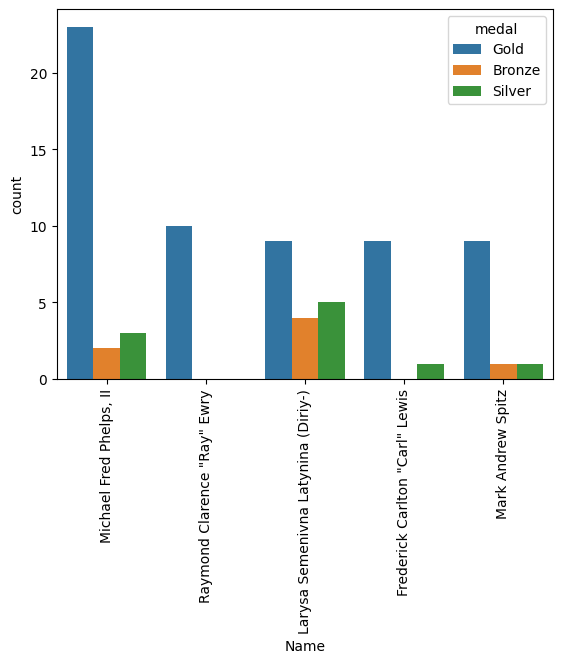

In [58]:
sns.barplot(data=top_winners, x='Name',y='count',hue='medal')
plt.xticks(rotation='vertical')
plt.show()

In [65]:
group_by_sex = df.groupby('Sex').sum()[['Gold','Bronze','Silver']].reset_index()
group_by_sex

C:\Users\sanja\AppData\Local\Temp\ipykernel_1456\2138974430.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_sex = df.groupby('Sex').sum()[['Gold','Bronze','Silver']].reset_index()


,Sex,Gold,Bronze,Silver
0,F,3140,3174,3128
1,M,8316,8235,8084


In [68]:
group_by_sex= pd.melt(group_sex,id_vars=['Sex'],var_name='medal',value_name='count')

<Axes: xlabel='Sex', ylabel='count'>

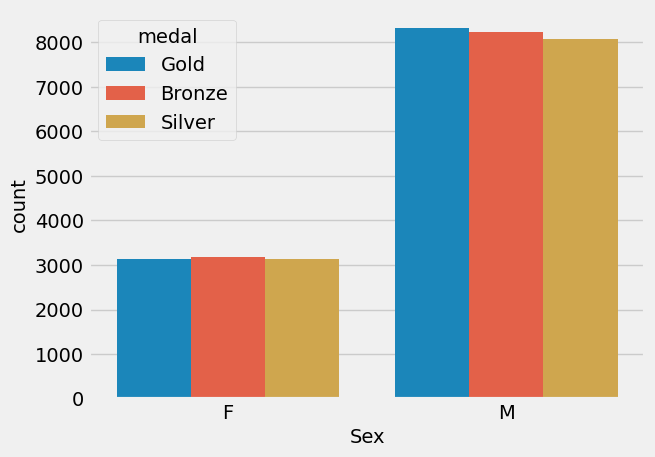

In [72]:
plt.style.use('fivethirtyeight')
sns.barplot(data=group_by_sex, x='Sex',y='count',hue='medal')

In [78]:
df['Age'].fillna(25,inplace=True)

In [85]:
group_by_age = df.groupby('Age').sum()[['Gold','Bronze','Silver']].sort_values(by='Gold',ascending=False).reset_index()

C:\Users\sanja\AppData\Local\Temp\ipykernel_1456\3192787679.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by_age = df.groupby('Age').sum()[['Gold','Bronze','Silver']].sort_values(by='Gold',ascending=False).reset_index()


In [86]:
group_by_age= pd.melt(group_by_age,id_vars=['Age'],var_name='medal',value_name='count')

In [87]:
group_by_age

,Age,medal,count
0,25.0,Gold,1024
1,23.0,Gold,974
2,22.0,Gold,959
3,24.0,Gold,948
4,21.0,Gold,825
...,...,...,...
217,62.0,Silver,0
218,61.0,Silver,4
219,11.0,Silver,1
220,12.0,Silver,3


<Axes: xlabel='Age', ylabel='count'>

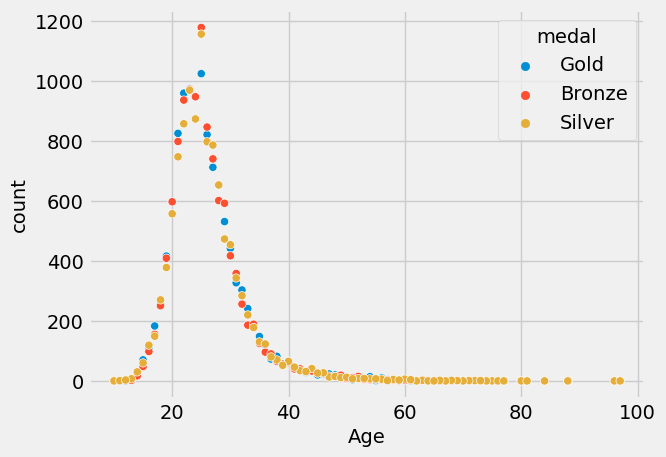

In [90]:
sns.scatterplot(data=group_by_age,x='Age',y='count',hue='medal')

In [94]:
df['Sport'].value_counts().sort_values(ascending=False).head(10)

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10827
Fencing       10735
Rowing        10595
Wrestling      7154
Football       6745
Sailing        6549
Name: Sport, dtype: int64

In [97]:
df['Event'].value_counts(ascending=False)

Football Men's Football                                5733
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
Cycling Men's Road Race, Individual                    2947
                                                       ... 
Archery Men's Target Archery, 50 metres, Individual       2
Sailing Mixed 18 foot                                     2
Croquet Mixed Doubles                                     2
Basque Pelota Men's Two-Man Teams With Cesta              2
Aeronautics Mixed Aeronautics                             1
Name: Event, Length: 651, dtype: int64

In [117]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
